In [83]:
#EXPLORATORY DATA ANALYSIS of CAPSTONE 1
#TITLE:Biomarker identification for the detection of breast cancer

In [84]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy.stats import t, ttest_ind_from_stats
#Read CSV file using pandas
# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

df = pd.read_csv('dataR2.csv')


In [85]:
df_healthy = df[df['Classification'] == 1]
df_patient = df[df['Classification'] == 2]


<AxesSubplot:>

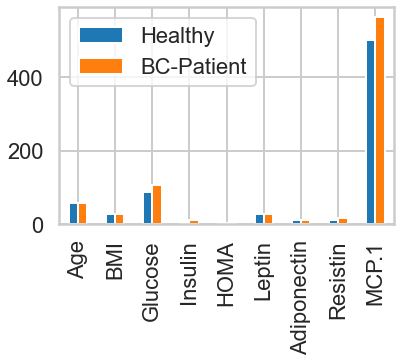

In [86]:
#Descriptive Statistics
df1 = df_healthy.drop(columns='Classification', axis=1)
df2 = df_patient.drop(columns='Classification', axis=1)
pd.concat({
    'Healthy': df1.mean(), 'BC-Patient': df2.mean()
}, axis=1).plot.bar()

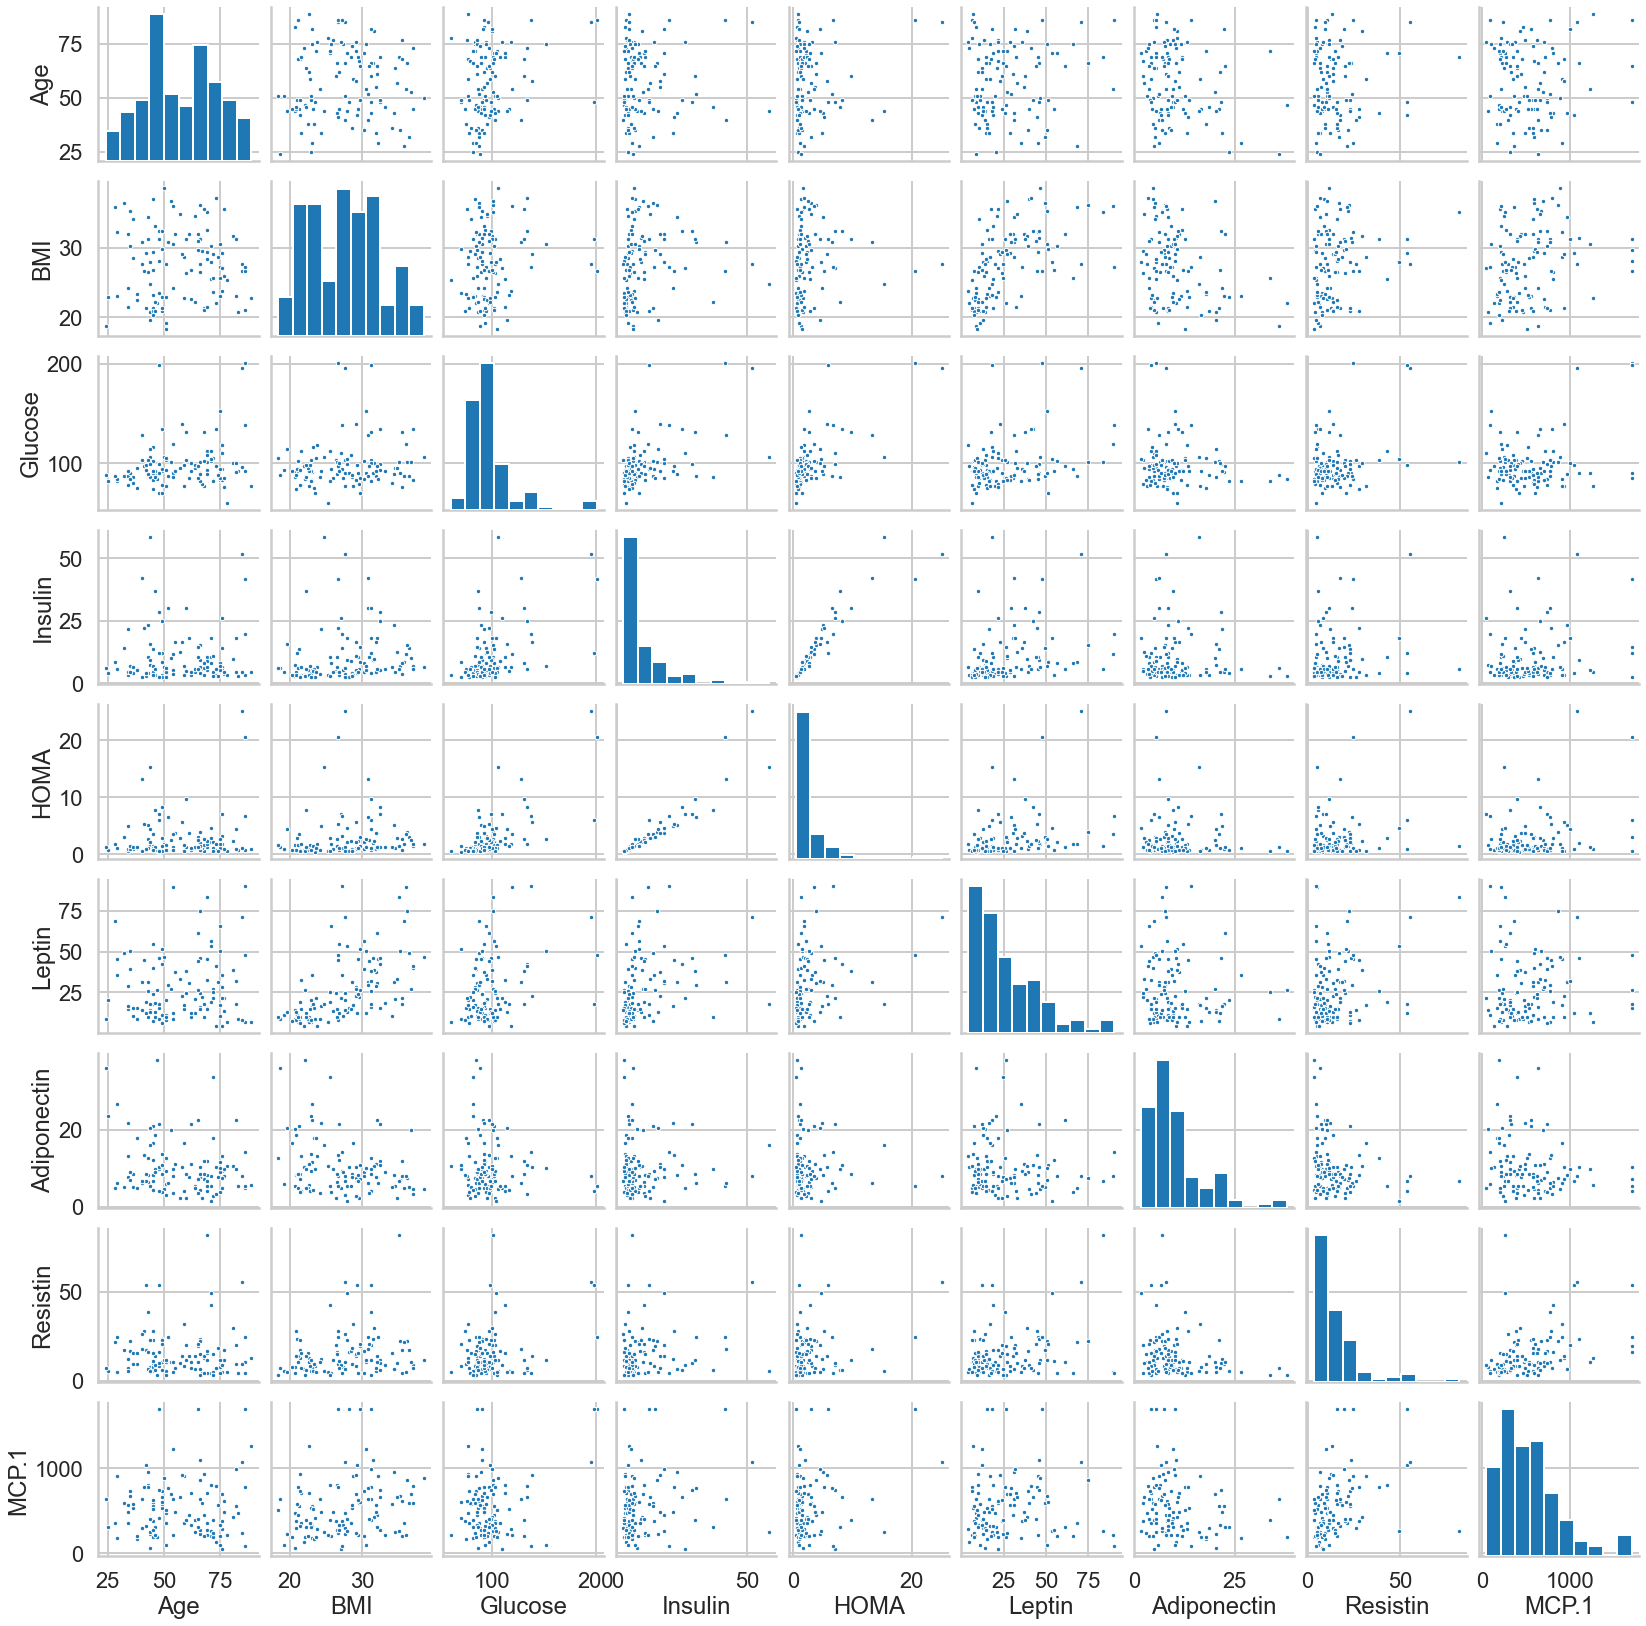

In [87]:
data = df[['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']]

sns.pairplot(data, plot_kws=dict(s=20, linewidth=1))

In [88]:
#Generating a correlation matrix 
corr = df.corr()
print (corr)

                     Age       BMI   Glucose   Insulin      HOMA    Leptin  \
Age             1.000000  0.008530  0.230106  0.032495  0.127033  0.102626   
BMI             0.008530  1.000000  0.138845  0.145295  0.114480  0.569593   
Glucose         0.230106  0.138845  1.000000  0.504653  0.696212  0.305080   
Insulin         0.032495  0.145295  0.504653  1.000000  0.932198  0.301462   
HOMA            0.127033  0.114480  0.696212  0.932198  1.000000  0.327210   
Leptin          0.102626  0.569593  0.305080  0.301462  0.327210  1.000000   
Adiponectin    -0.219813 -0.302735 -0.122121 -0.031296 -0.056337 -0.095389   
Resistin        0.002742  0.195350  0.291327  0.146731  0.231101  0.256234   
MCP.1           0.013462  0.224038  0.264879  0.174356  0.259529  0.014009   
Classification -0.043555 -0.132586  0.384315  0.276804  0.284012 -0.001078   

                Adiponectin  Resistin     MCP.1  Classification  
Age               -0.219813  0.002742  0.013462       -0.043555  
BMI      

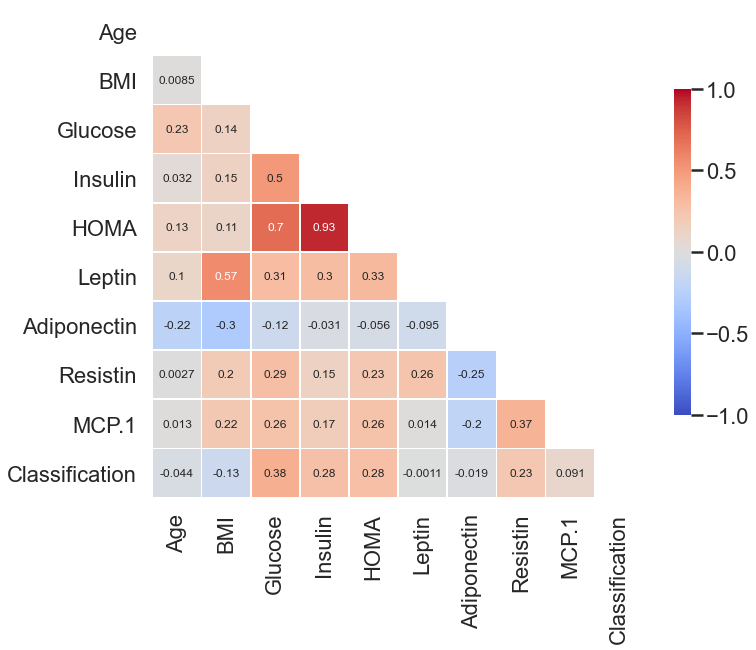

In [89]:
empty = np.zeros_like(corr, dtype=np.bool)
empty[np.triu_indices_from(empty)]= True
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [90]:
#Writing a function for calculating a t-statistic
dfg= df.groupby('Classification')
#compare the means of feature Age, BMI, Glucose, Insulin, Leptin, Adiponectin, Resistin, MCP.1
n0 = dfg.count().loc[1][0]
n1 = dfg.count().loc[2][0]
#store t-value and p-value in a dictionary
for i in df.columns[0:9]:
    x0 = dfg.mean().loc[1,str(i)]
    x1 = dfg.mean().loc[2,str(i)]
    s0 = dfg.mean().loc[1,str(i)]
    s1 = dfg.mean().loc[2,str(i)]
    std_pool = np.sqrt(((n0-1) * (s0 ** 2) + (n1-1) * (s1 ** 2)) / (n0 + n1 - 2))
    t_critical_stats, p_value_stats = ttest_ind_from_stats(x0, s0, n0, x1, s1, n1)
    print (i, p_value_stats)
    
    







0.8957458462806489
0.7963190102606722
0.3464191007594487
0.004819731493098419
0.00020073873318128215
0.9933636378212817
0.8885263624204628
0.04634428925109403
0.5280955099416779
